In [29]:
import json
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
@qml.compile()
def model(alpha):
    """In this qnode you will define your model in such a way that there is a single 
    parameter alpha which returns each of the basic states.

    Args:
        alpha (float): The only parameter of the model.

    Returns:
        (numpy.tensor): The probability vector of the resulting quantum state.
    """
    # Put your code here #
    

    # The following lines are the encoding of each qubit
    qml.RZ(alpha*2*np.pi/(2**1), wires=0)
    qml.RZ(alpha*2*np.pi/(2**2), wires=1)
    qml.RZ(alpha*2*np.pi/(2**3), wires=2)
    
    return qml.probs(wires=range(3))

def generate_coefficients():
    """This function must return a list of 8 different values of the parameter that
    generate the states 000, 001, 010, ..., 111, respectively, with your ansatz.

    Returns:
        (list(int)): A list of eight real numbers.
    """
    # Put your code here #
    return [0.1, 1.2, 2.3, 3.8, 4.1, 4.9, 5.8, 7.0]



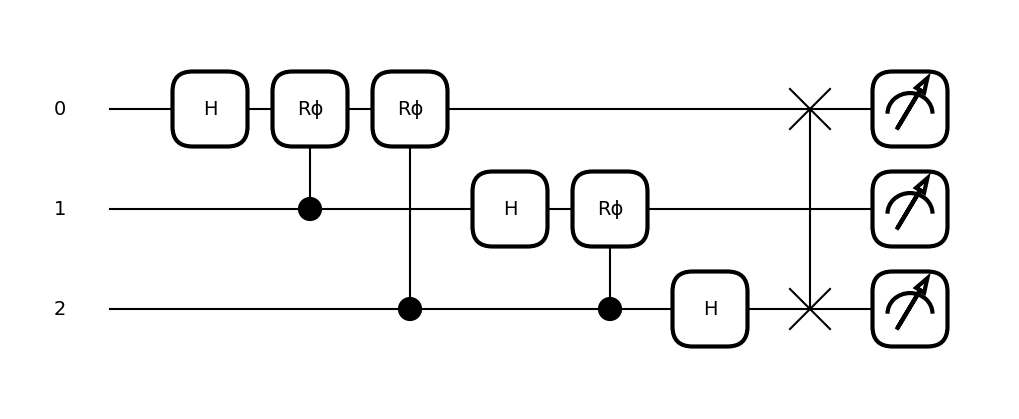

In [30]:
qml.draw_mpl(model, show_all_wires=True)(6)
plt.show()

In [31]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None

def check(solution_output, expected_output: str) -> None:
    coefs = generate_coefficients()
    output = np.array([model(c) for c in coefs])
    epsilon = 0.001
    
    for i in range(len(coefs)):
        assert np.isclose(output[i][i], 1)

    def is_continuous(function, point):
        limit = calculate_limit(function, point)

        if limit is not None and sum(abs(limit - function(point))) < epsilon:
            return True
        else:
            return False

    def is_continuous_in_interval(function, interval):
        for point in interval:
            if not is_continuous(function, point):
                return False
        return True

    def calculate_limit(function, point):
        x_values = [point - epsilon, point, point + epsilon]
        y_values = [function(x) for x in x_values]
        average = sum(y_values) / len(y_values)

        return average

    assert is_continuous_in_interval(model, np.arange(0,10,0.001))

    for coef in coefs:
        assert coef >= 0 and coef <= 10


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...


AssertionError: 